Bob Ross painting -- visual **analysing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("/content/sample_data/elements-by-episode.csv")

In [21]:
data.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED,SEASON
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [22]:
data.shape

(403, 70)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EPISODE             403 non-null    object
 1   TITLE               403 non-null    object
 2   APPLE_FRAME         403 non-null    int64 
 3   AURORA_BOREALIS     403 non-null    int64 
 4   BARN                403 non-null    int64 
 5   BEACH               403 non-null    int64 
 6   BOAT                403 non-null    int64 
 7   BRIDGE              403 non-null    int64 
 8   BUILDING            403 non-null    int64 
 9   BUSHES              403 non-null    int64 
 10  CABIN               403 non-null    int64 
 11  CACTUS              403 non-null    int64 
 12  CIRCLE_FRAME        403 non-null    int64 
 13  CIRRUS              403 non-null    int64 
 14  CLIFF               403 non-null    int64 
 15  CLOUDS              403 non-null    int64 
 16  CONIFER             403 no

In [7]:
data.isna().sum().sort_values(ascending=False)

,0
EPISODE,0
TITLE,0
APPLE_FRAME,0
AURORA_BOREALIS,0
BARN,0
...,...
WAVES,0
WINDMILL,0
WINDOW_FRAME,0
WINTER,0


In [8]:
data = data.drop_duplicates()

In [10]:
id_cols = ["EPISODE", "TITLE"]
element_cols = [col for col in data.columns if col not in id_cols]

In [11]:
data["SEASON"] = data["EPISODE"].str.extract(r"S(\d+)").astype(int)

In [12]:
data[["EPISODE", "SEASON"]].head()

,EPISODE,SEASON
0,S01E01,1
1,S01E02,1
2,S01E03,1
3,S01E04,1
4,S01E05,1


In [17]:
element_freq = data[element_cols].sum().sort_values(ascending=False)

In [18]:
element_per = (element_freq / len(data)) * 100

In [19]:
element_summary = pd.DataFrame({
    "count": element_freq,
    "percentage": element_per
})

element_summary.head(7)

,count,percentage
TREE,361,89.578164
TREES,337,83.622829
DECIDUOUS,227,56.327543
CONIFER,212,52.605459
CLOUDS,179,44.416873
MOUNTAIN,160,39.702233
LAKE,143,35.483871


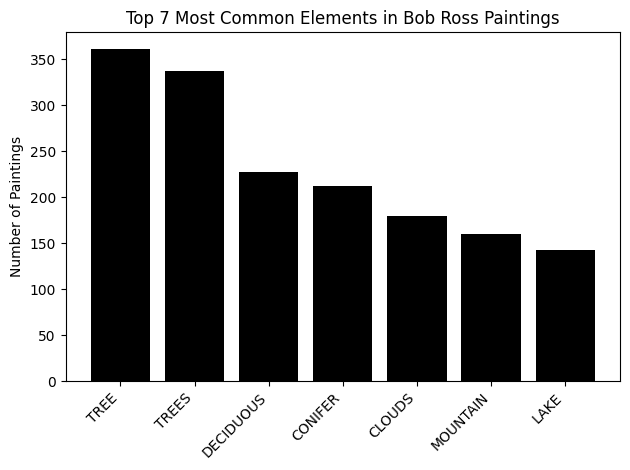

In [37]:
top_7 = element_summary.head(7)

plt.figure()
plt.bar(top_7.index, top_7["count"],color='black')
plt.xticks(rotation=45, ha="right")
plt.title("Top 7 Most Common Elements in Bob Ross Paintings")
plt.ylabel("Number of Paintings")
plt.tight_layout()
plt.show()


In [30]:
data["ELEMENT_COUNT"]=data[element_cols].sum(axis=1)

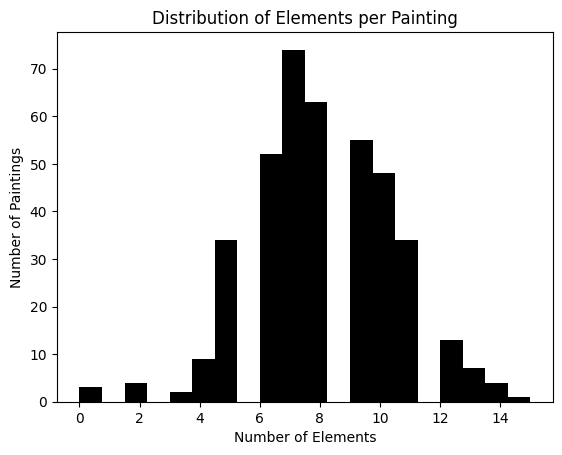

In [42]:
plt.figure()
plt.hist(data["ELEMENT_COUNT"], bins=20,color='black')
plt.title("Distribution of Elements per Painting")
plt.xlabel("Number of Elements")
plt.ylabel("Number of Paintings")
plt.show()

In [32]:
data["ELEMENT_COUNT"].describe()

,ELEMENT_COUNT
count,403.000000
mean,7.992556
std,2.364212
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,15.000000


In [34]:
Mountains_data = data[data["MOUNTAIN"]==1]
Mountains_coocr = Mountains_data[element_cols].mean().sort_values(ascending=False)
Mountains_coocr.head(7)

,0
MOUNTAIN,1.00000
TREE,0.97500
TREES,0.92500
CONIFER,0.80625
SNOWY_MOUNTAIN,0.68125
MOUNTAINS,0.61250
CLOUDS,0.53750


In [36]:
rare_ele = element_per[element_per<4].sort_values()
rare_ele

,0
LAKES,0.000000
DIANE_ANDRE,0.248139
DOCK,0.248139
APPLE_FRAME,0.248139
TRIPLE_FRAME,0.248139
RECTANGLE_3D_FRAME,0.248139
PERSON,0.248139
RECTANGULAR_FRAME,0.248139
FIRE,0.248139
HALF_OVAL_FRAME,0.248139


In [40]:
season_compl=data.groupby("SEASON")[element_cols].mean()
season_compl.head()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
SEASON,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.076923,0.0,0.000000,0.0,0.384615,0.230769,0.0,...,0.0,0.923077,0.923077,0.0,0.000000,0.000000,0.000000,0.0,0.230769,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.538462,0.076923,0.0,...,0.0,1.000000,1.000000,0.0,0.153846,0.153846,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.076923,0.000000,0.0,0.076923,0.0,0.307692,0.230769,0.0,...,0.0,0.923077,0.923077,0.0,0.000000,0.153846,0.000000,0.0,0.076923,0.0
4,0.0,0.0,0.000000,0.076923,0.0,0.000000,0.0,0.384615,0.230769,0.0,...,0.0,1.000000,0.923077,0.0,0.000000,0.076923,0.000000,0.0,0.153846,0.0
5,0.0,0.0,0.153846,0.000000,0.0,0.000000,0.0,0.153846,0.000000,0.0,...,0.0,0.769231,0.692308,0.0,0.076923,0.076923,0.076923,0.0,0.076923,0.0


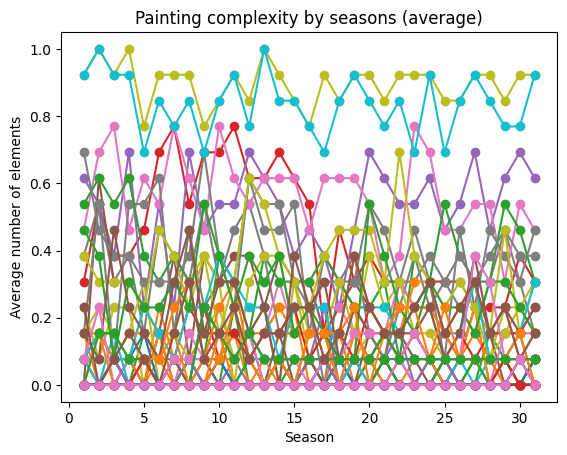

In [41]:
plt.figure()
plt.plot(season_compl.index,season_compl.values,marker='o')
plt.title("Painting complexity by seasons (average)")
plt.xlabel("Season")
plt.ylabel("Average number of elements")
plt.show()